# Admission project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/sam/Desktop/csv/admission.csv')

In [3]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

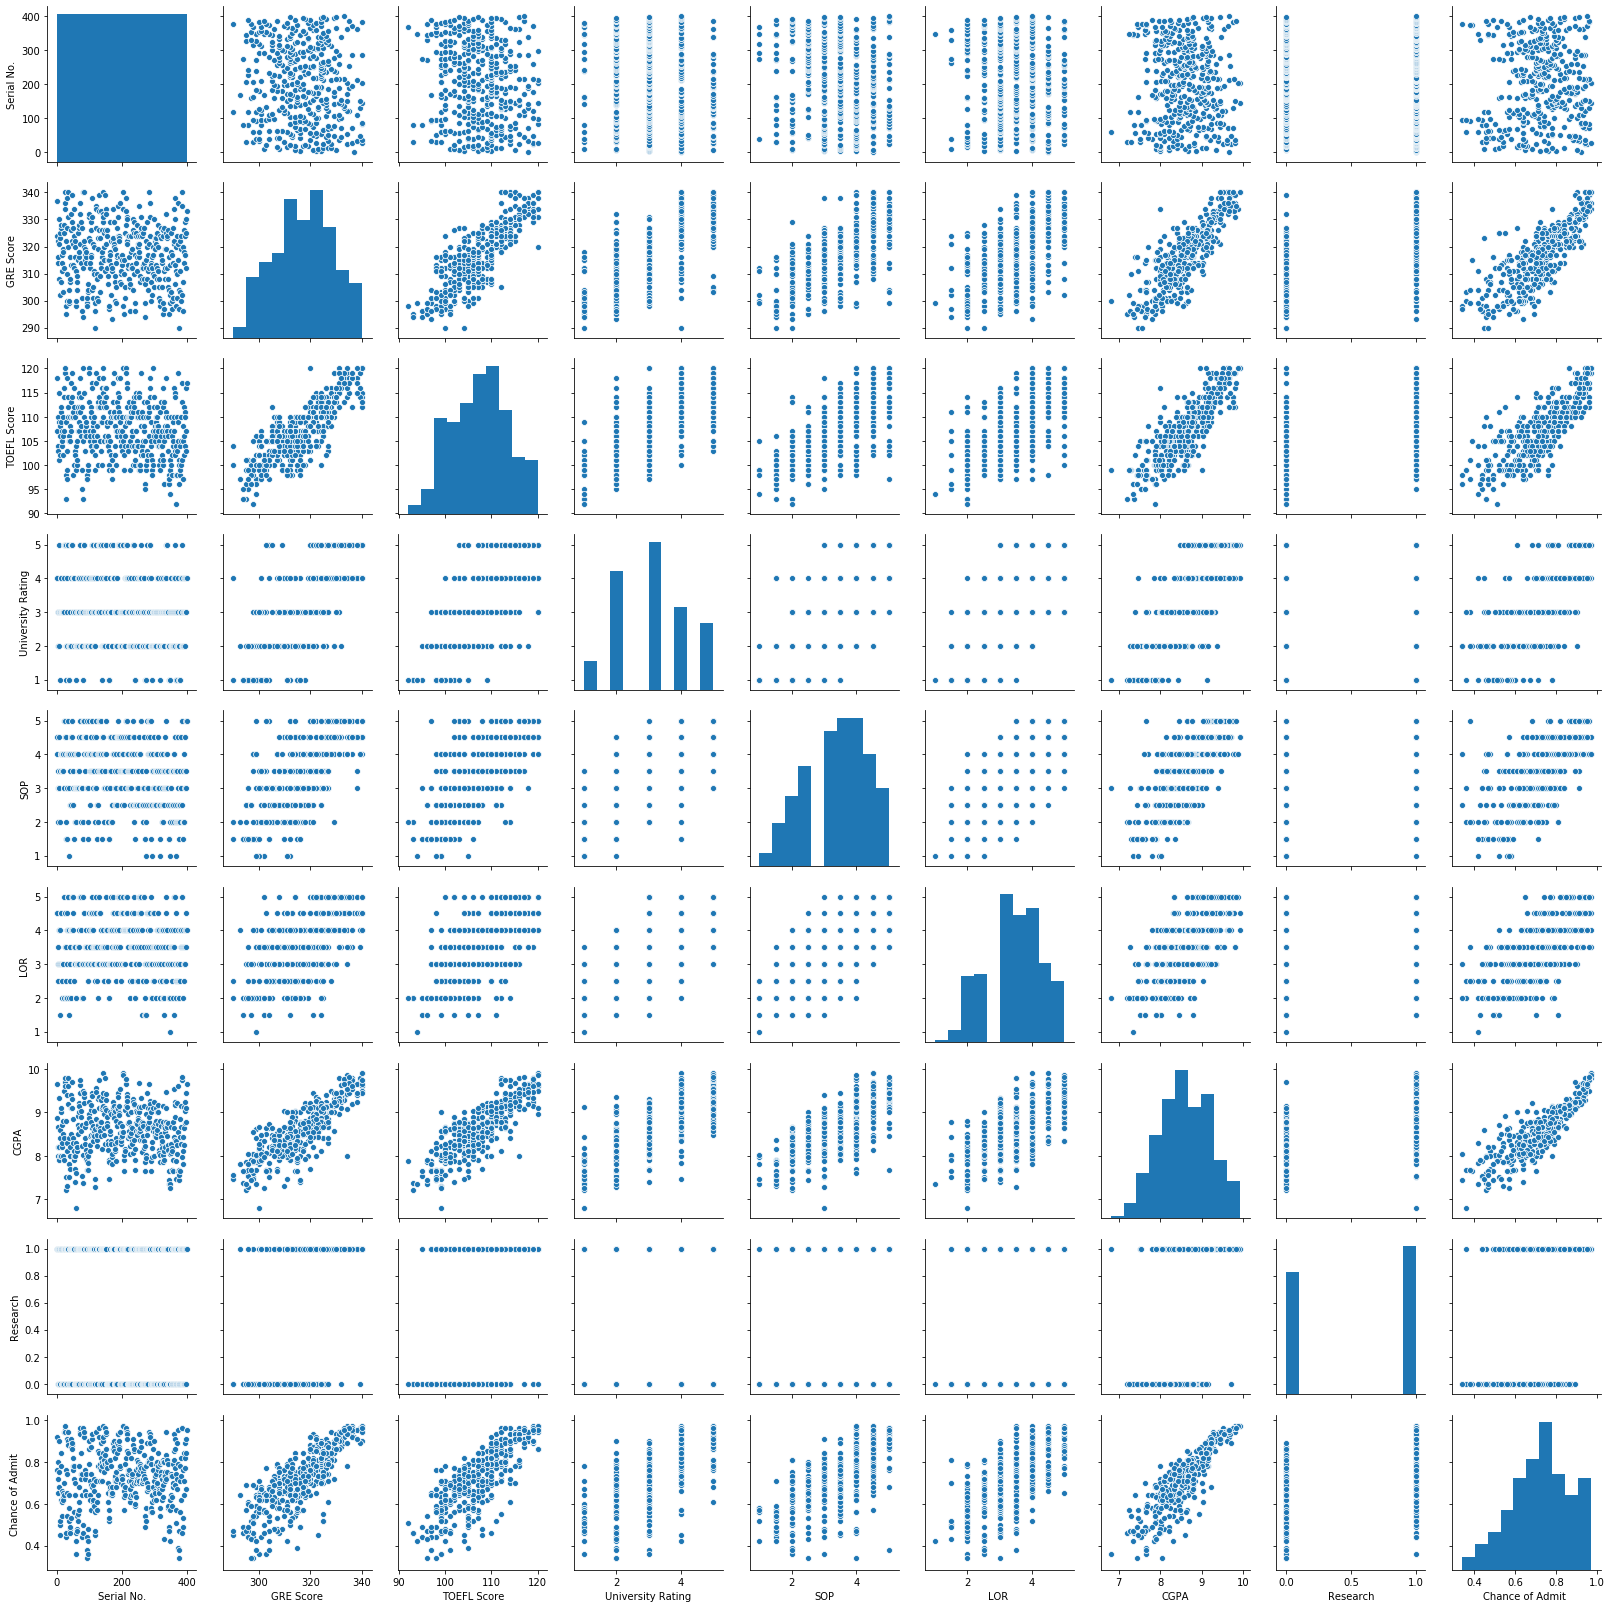

In [4]:
sns.pairplot(data)

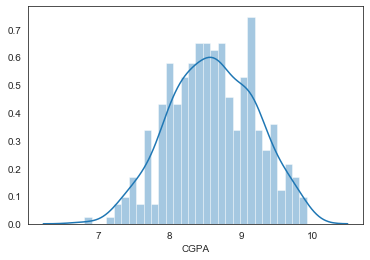

In [37]:
sns.set_style('white')
sns.distplot(data['CGPA'],bins=30)

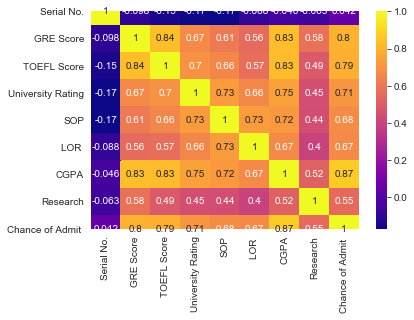

In [6]:
sns.heatmap(data.corr(),cmap='plasma',annot=True)

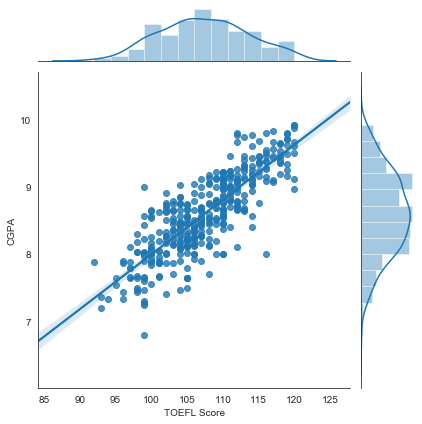

In [7]:
sns.jointplot(x='TOEFL Score',y='CGPA',data=data,kind='reg')

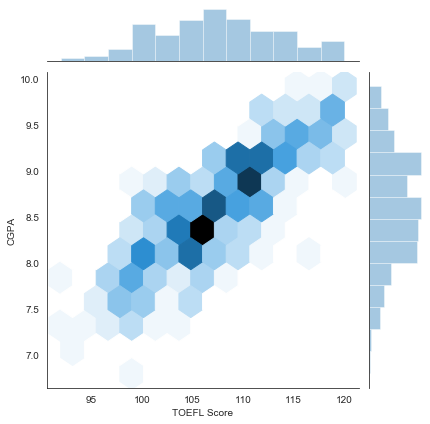

In [8]:
sns.jointplot(x='TOEFL Score',y='CGPA',data=data,kind='hex')

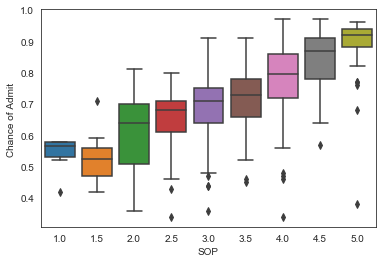

In [9]:
sns.boxplot('SOP','Chance of Admit ',data=data)

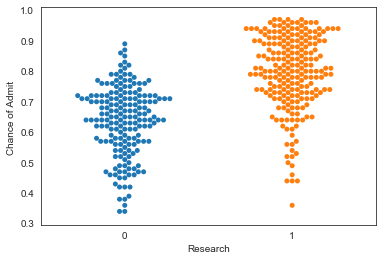

In [10]:
sns.swarmplot(x=data['Research'],y=data['Chance of Admit '])

# Performing Linear Regression 

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
X=data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP','LOR ', 'CGPA', 'Research']]
y=data['Chance of Admit ']

In [13]:
#If your are using anaconda version 1.9 are above we want to import model_selection from sklearn instead of cross_validation
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm=LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression()

In [18]:
print(lm.intercept_)

-1.3601631487972552


In [19]:
lm.coef_

array([ 0.00214557,  0.0032482 ,  0.01251213, -0.00125553,  0.01746565,
        0.11114456,  0.01128105])

# Predict

In [20]:
predictions=lm.predict(X_test)

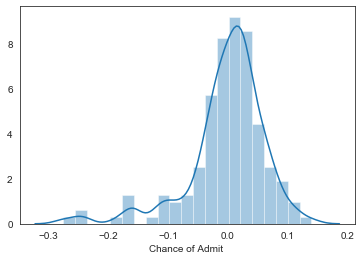

In [21]:
sns.distplot((y_test-predictions))

# Evalution of model

In [22]:
from sklearn import metrics

In [23]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 0.044882180156518146
MSE 0.004200044094253381
RMSE 0.06480774717773626


In [24]:
metrics.explained_variance_score(y_test,predictions)

0.7815987716780471

In [25]:
X_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research'],
      dtype='object')

In [26]:
frame=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [27]:
frame

Coeff
GRE Score          0.002146
TOEFL Score        0.003248
University Rating  0.012512
SOP               -0.001256
LOR                0.017466
CGPA               0.111145
Research           0.011281

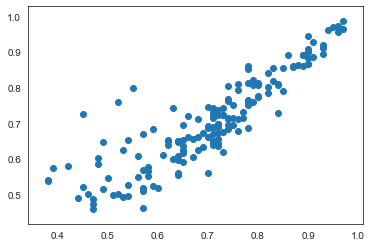

In [38]:
plt.scatter(x=y_test,y=predictions)

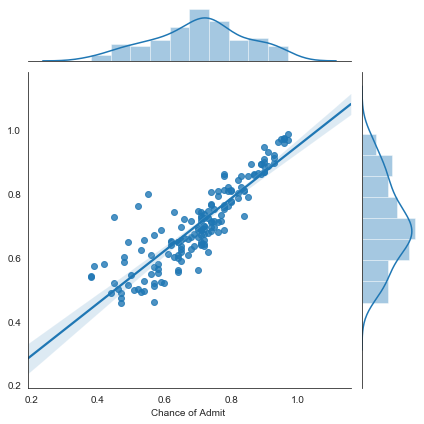

In [39]:
sns.jointplot(x=y_test,y=predictions,kind='reg')